# **Preprocessing**

In [0]:
import json
import pandas as pd
import numpy as np

from google.colab import drive
drive.mount('/content/drive')
barbellsreviews = json.load(open('drive/My Drive/Colab Notebooks/APRD6343_NEW/adidasreviews1.json','r'))

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
barbellstext = []
for areview in barbellsreviews:
  areview = barbellsreviews[areview]
  if 'reviewText' in areview:
    barbellstext.append(areview['reviewText'])

# convert review texts to dictionary
barbellsdict = dict(zip(range(len(barbellstext)), barbellstext))

In [0]:
! pip install tmtoolkit

import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

     |████████████████████████████████| 19.9MB 1.4MB/s 
     |████████████████████████████████| 2.3MB 37.3MB/s 
     |████████████████████████████████| 1.5MB 40.1MB/s 
     |████████████████████████████████| 112kB 57.0MB/s 
     |████████████████████████████████| 22.1MB 184kB/s 
     |████████████████████████████████| 3.0MB 30.0MB/s 
  Created wheel for nltk: filename=nltk-3.4.5-cp36-none-any.whl size=1449906 sha256=d6f34bd1cad16e12c6c1922fef58c57047e1e2918109441cd943f9acb03136a9
  Stored in directory: /root/.cache/pip/wheels/96/86/f6/68ab24c23f207c0077381a5e3904b2815136b879538a24b483
  Created wheel for globre: filename=globre-0.1.5-cp36-none-any.whl size=19528 sha256=393cbdeb200a9271a76710130b4d56c22f662eab6c12b7d8a0b9024a63661ed3
  Stored in directory: /root/.cache/pip/wheels/c4/3f/7f/be546f6d880521a8a7a1fe84cbe135fa859be63084682d3292
Successfully built nltk globre
  Found existing installation: nltk 3.2.5
    Uninstalling nltk-3.2.5:
      Successfully uninstalled nltk-3.2.5
  Foun

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [0]:
import random
random.seed(20191120) # to make the sampling reproducible
np.set_printoptions(precision=5)
from tmtoolkit.corpus import Corpus
corpus = Corpus()

# add documents to corpus
for key in barbellsdict:
  corpus.add_doc(str(key), barbellsdict[key])

In [0]:
print(len(corpus))
corpus.doc_labels
corpus['91']

27511


'My daughter kept borrowing the pair my husband has. She lives the textured surface on her feet. They fit perfectly.'

(array([2.6967e+04, 4.8900e+02, 3.9000e+01, 1.1000e+01, 2.0000e+00,
        1.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([    0. ,  1024.1,  2048.2,  3072.3,  4096.4,  5120.5,  6144.6,
         7168.7,  8192.8,  9216.9, 10241. ]),
 <a list of 10 Patch objects>)

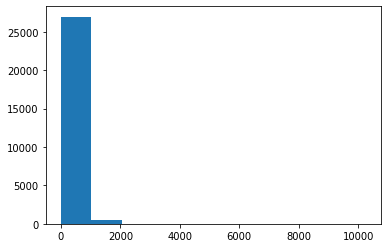

In [0]:
import matplotlib
matplotlib.pyplot.hist(corpus.doc_lengths.values()) 

In [0]:
# https://tmtoolkit.readthedocs.io/en/latest/preprocessing.html
from tmtoolkit.preprocess import TMPreproc

preproc = TMPreproc(corpus)
preproc.pos_tag()
preproc.lemmatize()
preproc.tokens_to_lowercase()
preproc.remove_special_chars_in_tokens()
preproc.add_stopwords(['http','nt'])

<TMPreproc [27511 documents]>

In [0]:
corpus['91']

'My daughter kept borrowing the pair my husband has. She lives the textured surface on her feet. They fit perfectly.'

In [0]:
preproc.tokens['91']

['my',
 'daughter',
 'keep',
 'borrow',
 'the',
 'pair',
 'my',
 'husband',
 'have',
 '',
 'she',
 'live',
 'the',
 'textured',
 'surface',
 'on',
 'her',
 'foot',
 '',
 'they',
 'fit',
 'perfectly',
 '']

In [0]:
preproc.vocabulary_size

29204

In [0]:
#preproc.stem()

In [0]:
preproc.tokens['91']

['my',
 'daughter',
 'keep',
 'borrow',
 'the',
 'pair',
 'my',
 'husband',
 'have',
 '',
 'she',
 'live',
 'the',
 'textured',
 'surface',
 'on',
 'her',
 'foot',
 '',
 'they',
 'fit',
 'perfectly',
 '']

In [0]:
preproc.tokens_datatable

,doc,position,token,meta_pos
0,0,0,a,DT
1,0,1,great,JJ
2,0,2,shoe,NN
3,0,3,,.
4,0,4,does,VBZ
...,...,...,...,...
36,9999,36,but,CC
37,9999,37,yo,JJ
38,9999,38,ucan,JJ
39,9999,39,expect,NN


In [0]:
preproc_smaller = preproc.copy()
preproc_smaller.filter_for_pos('N')
preproc_smaller.clean_tokens(remove_numbers = True, remove_shorter_than = 2)
preproc_smaller.remove_common_tokens(df_threshold = 1)
#preproc_smaller.remove_uncommon_tokens(df_threshold = 0.005)

print(preproc.vocabulary_size)
print(preproc_smaller.vocabulary_size)

29204
18503


In [0]:
preproc_smaller.tokens_dataframe

token meta_pos
doc  position                   
0    0             shoe       NN
     1              lot       NN
     2           really      NNP
     3            style       NN
1    0             pair      NNS
...                 ...      ...
9999 2             week       NN
     3         function      NNS
     4         anything       NN
     5             side       NN
     6           expect       NN

[293810 rows x 2 columns]

In [0]:
print(preproc.tokens['91'])
print(preproc_smaller.tokens['91'])
print(preproc.tokens['1'])
print(preproc_smaller.tokens['1'])
print(preproc.tokens['2000'])
print(preproc_smaller.tokens['2000'])

['my', 'daughter', 'keep', 'borrow', 'the', 'pair', 'my', 'husband', 'have', '', 'she', 'live', 'the', 'textured', 'surface', 'on', 'her', 'foot', '', 'they', 'fit', 'perfectly', '']
['daughter', 'pair', 'husband', 'surface', 'foot']
['i', 'have', '4', 'pair', 'of', 'these', 'shoe', 'and', 'i', 'love', 'them', 'to', 'death', '', 'they', 'be', 'as', 'close', 'to', 'indestructable', 'as', 'any', 'shoe', 'i', 've', 'ever', 'own', '', 'then', 'you', 're', 'probably', 'ask', 'why', 'i', 'have', 'so', 'many', '', 'well', '', 'the', 'answer', 'be', 'that', 'this', 'be', 'the', 'only', 'shoe', 'i', 'know', 'of', 'that', 'come', 'in', 'so', 'many', 'color', '', 'i', 've', 'see', 'at', 'least', '7', 'or', '8', 'color', '', 'and', 'work', 'with', 'just', 'about', 'everything', 'in', 'your', 'wardrobe', '', 'jeans', '', 'khakis', '', 'whatever', 'they', 'work', '', 'and', 'i', 'love', 'em', '', '', '']
['pair', 'shoe', 'death', 'shoe', 'well', 'answer', 'shoe', 'color', 'color', 'everything', 'war

In [0]:
doc_labels = np.array(preproc.doc_labels)
doc_labels[:10]

array(['0', '1', '10', '100', '1000', '10000', '10001', '10002', '10003',
       '10004'], dtype='<U5')

In [0]:
vocab_bg = np.array(preproc.vocabulary)
vocab_sm = np.array(preproc_smaller.vocabulary)

In [0]:
dtm_bg = preproc.dtm # dtm - document term matrix
dtm_sm = preproc_smaller.dtm

dtm_bg, dtm_sm

(<27511x29204 sparse matrix of type '<class 'numpy.int32'>'
 	with 1034175 stored elements in Compressed Sparse Row format>,
 <27511x18503 sparse matrix of type '<class 'numpy.int32'>'
 	with 250300 stored elements in Compressed Sparse Row format>)

# **Creating Models**

In [0]:
!pip install tmtoolkit['lda']
import logging
import warnings
from tmtoolkit.topicmod.tm_lda import compute_models_parallel

     |████████████████████████████████| 358kB 3.4MB/s 
     |████████████████████████████████| 102kB 7.7MB/s 


In [0]:
# suppress the "INFO" messages and warnings from Ida
logger = logging.getLogger('lda')
#logger.addHandler(logging.NullHandler())
logger.addHandler(logging.NullHandler())
logger.propagate = False

warnings.filterwarnings('ignore')

# set data to use
dtms = {
    'bigger': dtm_bg,
    'smaller': dtm_sm
}

# and fixed hyperparameters
lda_params = {
    'n_topics': 51,
    'eta': .01,  #beta parameter
    'n_iter': 1000,
    'random_state': 20191122  #to make resutls reproducible
}


In [0]:
models = compute_models_parallel(dtms, constant_parameters=lda_params)

In [0]:
from tmtoolkit.topicmod.model_io import print_ldamodel_topic_words

model_sm = models['smaller'][0][1]
print_ldamodel_topic_words(model_sm.topic_word_, vocab_sm, top_n = 5)

topic_1
> #1. review (0.043179)
> #2. thing (0.041998)
> #3. star (0.030529)
> #4. something (0.029349)
> #5. issue (0.027325)
topic_2
> #1. shoe (0.144163)
> #2. pair (0.087196)
> #3. leather (0.058962)
> #4. adidas (0.049827)
> #5. samba (0.045509)
topic_3
> #1. pant (0.199462)
> #2. jacket (0.037684)
> #3. leg (0.030459)
> #4. size (0.029892)
> #5. medium (0.027626)
topic_4
> #1. shoe (0.166822)
> #2. mile (0.045655)
> #3. run (0.035701)
> #4. running (0.033843)
> #5. runner (0.030791)
topic_5
> #1. bag (0.152110)
> #2. pocket (0.069534)
> #3. gym (0.042310)
> #4. backpack (0.034370)
> #5. water (0.026317)
topic_6
> #1. adidas (0.105966)
> #2. men (0.069799)
> #3. woman (0.041457)
> #4. way (0.025594)
> #5. sneaker (0.022845)
topic_7
> #1. product (0.181712)
> #2. quality (0.149530)
> #3. price (0.078887)
> #4. adidas (0.050630)
> #5. brand (0.041995)
topic_8
> #1. shirt (0.198000)
> #2. fit (0.032663)
> #3. material (0.032194)
> #4. size (0.026256)
> #5. wash (0.026256)
topic_9
> #

In [0]:
model_bg = models['bigger'][0][1]
print_ldamodel_topic_words(model_bg.topic_word_, vocab_bg, top_n = 5)

topic_1
> #1.  (0.094719)
> #2. size (0.079187)
> #3. a (0.069545)
> #4. i (0.067083)
> #5. be (0.029834)
topic_2
> #1.  (0.133464)
> #2. and (0.051605)
> #3. shoe (0.046397)
> #4. on (0.038603)
> #5. the (0.035906)
topic_3
> #1.  (0.125224)
> #2. recommend (0.089309)
> #3. i (0.082760)
> #4. would (0.070204)
> #5. to (0.038544)
topic_4
> #1.  (0.125522)
> #2. be (0.062562)
> #3. the (0.058389)
> #4. and (0.043921)
> #5. i (0.027426)
topic_5
> #1.  (0.768658)
> #2. 34 (0.062228)
> #3. adidas (0.006252)
> #4. no (0.005731)
> #5. 2 (0.005399)
topic_6
> #1. i (0.103909)
> #2.  (0.076150)
> #3. to (0.055718)
> #4. the (0.037287)
> #5. and (0.035187)
topic_7
> #1.  (0.145309)
> #2. as (0.087442)
> #3. be (0.077219)
> #4. not (0.048701)
> #5. the (0.047041)
topic_8
> #1.  (0.124468)
> #2. nt (0.078205)
> #3. do (0.060807)
> #4. it (0.054853)
> #5. i (0.054743)
topic_9
> #1.  (0.079501)
> #2. the (0.068848)
> #3. be (0.054530)
> #4. to (0.047437)
> #5. i (0.045275)
topic_10
> #1.  (0.111174)


In [0]:
import logging
import warnings
import lda
warnings.filterwarnings('ignore')

lda_tm = lda.LDA(n_topics=51, n_iter=1000, random_state=20191122, eta=.01 )
lda_tm.fit(dtm_sm)

In [0]:
topic_word = lda_tm.topic_word_
n_top_words = 10
for i, topic_dist in enumerate(topic_word):
  topic_word = np.array(vocab_sm)[np.argsort(topic_dist)][:-n_top_words - 1:-1]
  print('Topic{}:{}'.format(i,' '.join(topic_word)))

Topic0:review thing star something issue time reason problem people nothing
Topic1:shoe pair leather adidas samba year tongue sambas look wear
Topic2:pant jacket leg size medium fit length waist material pocket
Topic3:shoe mile run running runner adidas marathon cushioning pair week
Topic4:bag pocket gym backpack water side bottle room clothes strap
Topic5:adidas men woman way sneaker man guy women friend superstar
Topic6:product quality price adidas brand great color material fit fabric
Topic7:shirt fit material size wash medium fabric quality tshirt tee
Topic8:day foot time hour work week pain home couple break
Topic9:size shoe order review amazon fit half problem way online
Topic10:size daughter color quality kid son month boy baby outfit
Topic11:product time quality item purchase delivery thanks excellent condition thank
Topic12:shoe basketball support pair foot court price ankle anyone traction
Topic13:short brief boxer material pair fabric fit waist leg compression
Topic14:boot f

In [0]:
from tmtoolkit.topicmod.model_io import ldamodel_top_topic_words
tm = pd.DataFrame(ldamodel_top_topic_words(model_sm.topic_word_, vocab_sm, top_n=5)).reset_index()
tm = tm.drop(columns = 'topic')
tm.head(15)

,rank_1,rank_2,rank_3,rank_4,rank_5
0,review (0.04318),thing (0.042),star (0.03053),something (0.02935),issue (0.02732)
1,shoe (0.1442),pair (0.0872),leather (0.05896),adidas (0.04983),samba (0.04551)
2,pant (0.1995),jacket (0.03768),leg (0.03046),size (0.02989),medium (0.02763)
3,shoe (0.1668),mile (0.04565),run (0.0357),running (0.03384),runner (0.03079)
4,bag (0.1521),pocket (0.06953),gym (0.04231),backpack (0.03437),water (0.02632)
5,adidas (0.106),men (0.0698),woman (0.04146),way (0.02559),sneaker (0.02284)
6,product (0.1817),quality (0.1495),price (0.07889),adidas (0.05063),brand (0.042)
7,shirt (0.198),fit (0.03266),material (0.03219),size (0.02626),wash (0.02626)
8,day (0.1611),foot (0.1302),time (0.0568),hour (0.04609),work (0.03976)
9,size (0.3165),shoe (0.2125),order (0.06181),review (0.03521),amazon (0.0292)


In [0]:
import re
barbellstopics = ''
for i in range(len(tm)):
  words = list(tm.iloc[i,:])
  aline = str(i)+': '+' '.join([re.sub(r'\s\(.*?\)','', w) for w in words])
  barbellstopics += aline + '\n'

print(barbellstopics)

0: review thing star something issue
1: shoe pair leather adidas samba
2: pant jacket leg size medium
3: shoe mile run running runner
4: bag pocket gym backpack water
5: adidas men woman way sneaker
6: product quality price adidas brand
7: shirt fit material size wash
8: day foot time hour work
9: size shoe order review amazon
10: size daughter color quality kid
11: product time quality item purchase
12: shoe basketball support pair foot
13: short brief boxer material pair
14: boot foot weather winter fit
15: shoe foot heel sole toe
16: gift husband son christmas bought
17: shoe golf course round foot
18: shoe support foot arch bit
19: store amazon pair price adidas
20: pair shoe year time adidas
21: lace thing way problem top
22: great fit feel price highly
23: product amazon order shipping return
24: shoe price money deal time
25: muy la que el para
26: shoe toe foot box size
27: shoe foot pair running support
28: sport comfy perfect work bra
29: shoe lot color compliment people
30: 

In [0]:
outputfile = open('drive/My Drive/Colab Notebooks/APRD6343_NEW//adidastopics.txt', 'w')

outputfile.write(barbellstopics)
outputfile.close()

# **Eval**

In [0]:
const_params = {'n_iter':1000,'eta':0.1,'random_state':20191122}
ks = list(range(1,25,2))
print(ks)
varying_params = [dict(n_topics=k,alpha=1/k) for k in ks]
print(varying_params)

[1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23]
[{'n_topics': 1, 'alpha': 1.0}, {'n_topics': 3, 'alpha': 0.3333333333333333}, {'n_topics': 5, 'alpha': 0.2}, {'n_topics': 7, 'alpha': 0.14285714285714285}, {'n_topics': 9, 'alpha': 0.1111111111111111}, {'n_topics': 11, 'alpha': 0.09090909090909091}, {'n_topics': 13, 'alpha': 0.07692307692307693}, {'n_topics': 15, 'alpha': 0.06666666666666667}, {'n_topics': 17, 'alpha': 0.058823529411764705}, {'n_topics': 19, 'alpha': 0.05263157894736842}, {'n_topics': 21, 'alpha': 0.047619047619047616}, {'n_topics': 23, 'alpha': 0.043478260869565216}]


In [0]:
from tmtoolkit.topicmod import tm_lda
eval_results= tm_lda.evaluate_topic_models(dtm_sm,
    varying_params,
    const_params)

In [0]:
from tmtoolkit.topicmod.evaluate import results_by_parameter
from tmtoolkit.topicmod.visualize import plot_eval_results

results_by_n_topics = results_by_parameter(eval_results, 'n_topics')
print(results_by_n_topics)

[(1, {'cao_juan_2009': nan, 'arun_2010': 805.005057834177, 'coherence_mimno_2011': -2.6644725845377133}), (3, {'cao_juan_2009': 0.45892995271505727, 'arun_2010': 719.6466087359207, 'coherence_mimno_2011': -3.1784512792100372}), (5, {'cao_juan_2009': 0.3318598434412148, 'arun_2010': 669.4083265143413, 'coherence_mimno_2011': -2.7674269751783824}), (7, {'cao_juan_2009': 0.33655188453873064, 'arun_2010': 620.380518141799, 'coherence_mimno_2011': -2.7168856751976014}), (9, {'cao_juan_2009': 0.3159394939433998, 'arun_2010': 572.56737380744, 'coherence_mimno_2011': -2.805511005369491}), (11, {'cao_juan_2009': 0.32709443991625836, 'arun_2010': 545.5819337442427, 'coherence_mimno_2011': -2.8236526268881987}), (13, {'cao_juan_2009': 0.2893329839463507, 'arun_2010': 530.0451937382779, 'coherence_mimno_2011': -2.9610868212570884}), (15, {'cao_juan_2009': 0.28261392690122233, 'arun_2010': 500.52195288216245, 'coherence_mimno_2011': -2.93534480580948}), (17, {'cao_juan_2009': 0.28833490307459786, '

(<Figure size 576x432 with 3 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f13cf2c4828>,
       dtype=object))

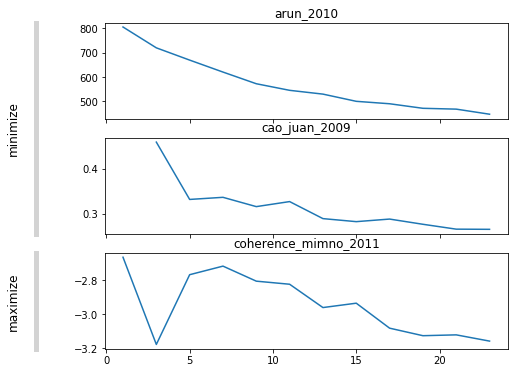

In [0]:
plot_eval_results(results_by_n_topics)

# **Eval (lower beta)**

In [0]:
const_params = {'n_iter':1000, 'eta':0.01, 'random_state':20191122}
ks = list(range(1, 25, 2))
print(ks)
varying_params = [dict(n_topics=k, alpha=1/(1*k)) for k in ks]
print(varying_params)

# no topic models will run the same every time beacuse we are sampling
# most of the documents will not have most of the topics
# lower k -- smaller proportion of share of topics in each document

[1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23]
[{'n_topics': 1, 'alpha': 1.0}, {'n_topics': 3, 'alpha': 0.3333333333333333}, {'n_topics': 5, 'alpha': 0.2}, {'n_topics': 7, 'alpha': 0.14285714285714285}, {'n_topics': 9, 'alpha': 0.1111111111111111}, {'n_topics': 11, 'alpha': 0.09090909090909091}, {'n_topics': 13, 'alpha': 0.07692307692307693}, {'n_topics': 15, 'alpha': 0.06666666666666667}, {'n_topics': 17, 'alpha': 0.058823529411764705}, {'n_topics': 19, 'alpha': 0.05263157894736842}, {'n_topics': 21, 'alpha': 0.047619047619047616}, {'n_topics': 23, 'alpha': 0.043478260869565216}]


In [0]:
from tmtoolkit.topicmod import tm_lda
eval_results = tm_lda.evaluate_topic_models(dtm_sm, varying_params, const_params)

In [0]:
from tmtoolkit.topicmod.evaluate import results_by_parameter
from tmtoolkit.topicmod.visualize import plot_eval_results

results_by_n_topics = results_by_parameter(eval_results, 'n_topics')
print(results_by_n_topics)

[(1, {'cao_juan_2009': nan, 'arun_2010': 804.3574048052549, 'coherence_mimno_2011': -2.6644725845377133}), (3, {'cao_juan_2009': 0.45136412574881507, 'arun_2010': 715.8131728403546, 'coherence_mimno_2011': -2.886155391632517}), (5, {'cao_juan_2009': 0.33278456564274517, 'arun_2010': 652.8555969751487, 'coherence_mimno_2011': -4.097490646049252}), (7, {'cao_juan_2009': 0.31371421307298053, 'arun_2010': 600.4170183470861, 'coherence_mimno_2011': -2.8512872815233905}), (9, {'cao_juan_2009': 0.3162481775932692, 'arun_2010': 569.792975764771, 'coherence_mimno_2011': -2.8377750643313715}), (11, {'cao_juan_2009': 0.3310329435206143, 'arun_2010': 536.264518563413, 'coherence_mimno_2011': -2.8748650148552497}), (13, {'cao_juan_2009': 0.3133111321073433, 'arun_2010': 521.4484784213327, 'coherence_mimno_2011': -2.953300972201798}), (15, {'cao_juan_2009': 0.30388853511880237, 'arun_2010': 482.0063739851495, 'coherence_mimno_2011': -2.93322881946446}), (17, {'cao_juan_2009': 0.3235854336874739, 'ar

(<Figure size 576x432 with 3 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f13cf2f7160>,
       dtype=object))

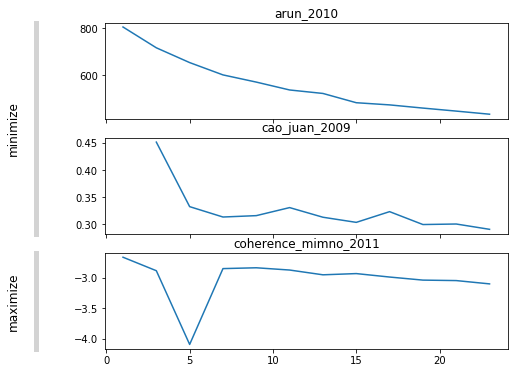

In [0]:
plot_eval_results(results_by_n_topics)

# **Eval (lower alpha)**

In [0]:
const_params = {'n_iter':1000, 'eta':0.1, 'random_state':20191122}
ks = list(range(1, 25, 2))
print(ks)
varying_params = [dict(n_topics=k, alpha=1/(10*k)) for k in ks]
print(varying_params)

# no topic models will run the same every time beacuse we are sampling
# most of the documents will not have most of the topics
# lower k -- smaller proportion of share of topics in each document

[1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23]
[{'n_topics': 1, 'alpha': 0.1}, {'n_topics': 3, 'alpha': 0.03333333333333333}, {'n_topics': 5, 'alpha': 0.02}, {'n_topics': 7, 'alpha': 0.014285714285714285}, {'n_topics': 9, 'alpha': 0.011111111111111112}, {'n_topics': 11, 'alpha': 0.00909090909090909}, {'n_topics': 13, 'alpha': 0.007692307692307693}, {'n_topics': 15, 'alpha': 0.006666666666666667}, {'n_topics': 17, 'alpha': 0.0058823529411764705}, {'n_topics': 19, 'alpha': 0.005263157894736842}, {'n_topics': 21, 'alpha': 0.004761904761904762}, {'n_topics': 23, 'alpha': 0.004347826086956522}]


In [0]:
from tmtoolkit.topicmod import tm_lda
eval_results = tm_lda.evaluate_topic_models(dtm_sm, varying_params, const_params)

In [0]:
from tmtoolkit.topicmod.evaluate import results_by_parameter
from tmtoolkit.topicmod.visualize import plot_eval_results

results_by_n_topics = results_by_parameter(eval_results, 'n_topics')
print(results_by_n_topics)

[(1, {'cao_juan_2009': nan, 'arun_2010': 805.005057834177, 'coherence_mimno_2011': -2.6644725845377133}), (3, {'cao_juan_2009': 0.21263288898423774, 'arun_2010': 762.3140519573898, 'coherence_mimno_2011': -2.6500103696929016}), (5, {'cao_juan_2009': 0.37763513515099867, 'arun_2010': 706.4616958662255, 'coherence_mimno_2011': -2.6096050815269827}), (7, {'cao_juan_2009': 0.40598870078687405, 'arun_2010': 626.0491916685501, 'coherence_mimno_2011': -2.6431837405769163}), (9, {'cao_juan_2009': 0.39210975162893974, 'arun_2010': 584.590471172668, 'coherence_mimno_2011': -2.732666076327904}), (11, {'cao_juan_2009': 0.39010079916338736, 'arun_2010': 579.1604438510697, 'coherence_mimno_2011': -2.7567506657711465}), (13, {'cao_juan_2009': 0.37092845407325303, 'arun_2010': 561.133583601376, 'coherence_mimno_2011': -2.8899641041744184}), (15, {'cao_juan_2009': 0.37273224802790295, 'arun_2010': 544.2535703880899, 'coherence_mimno_2011': -3.052491111101533}), (17, {'cao_juan_2009': 0.3625088836647948

(<Figure size 576x432 with 3 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f13cf3347f0>,
       dtype=object))

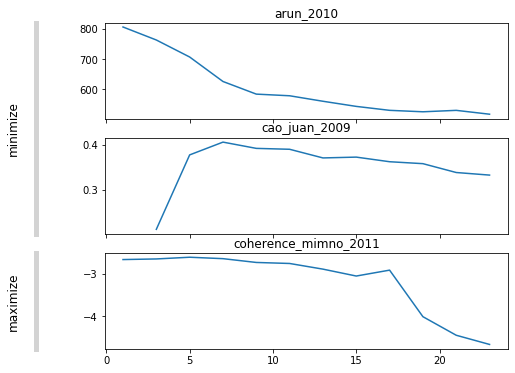

In [0]:
plot_eval_results(results_by_n_topics)

# **Topic Names and Classification**

In [0]:
from tmtoolkit.topicmod.model_io import ldamodel_top_doc_topics
from tmtoolkit.bow.bow_stats import doc_lengths
from tmtoolkit.topicmod.model_stats import generate_topic_labels_from_top_words
print(model_sm)
doc_topic = model_sm.doc_topic_
doc_labels = np.array(preproc_smaller.doc_labels)
topic_words = model_sm.topic_word_

doc_lengths_sm = doc_lengths(dtm_sm)

print(len(doc_topic))
print(len(doc_lengths_sm))

# remove 'uncommon words' preprocessing
topic_labels = generate_topic_labels_from_top_words(
    topic_words,
    doc_topic,
    doc_lengths_sm,
    vocab_sm,
    lambda_=.1
)

documentclassifications = ldamodel_top_doc_topics(doc_topic, doc_labels, top_n=2, topic_labels=topic_labels)

for index,arrow in documentclassifications.iterrows():
  documentclassifications.set_value(index, 'text', corpus[index])

27511
27511


In [0]:
print('Results:')
lookup = documentclassifications[documentclassifications['text'].str.contains('gift')]
print([lookup['text'].iloc[0], lookup['rank_1'].iloc[0]])

Results:
["Great sandals! Bought them as a Christmas gift for my husband. He has narrow, long feet and he usually wears a size 11. I'm glad I read some reviews about these running a size smaller. I got him a size 12 and they fit him like a glove! He says they're like walking on a cloud.", '49_chart (0.3168)']


In [0]:
print('Results:')
lookup = documentclassifications[documentclassifications['text'].str.contains('like')]
print([lookup['text'].iloc[0], lookup['rank_1'].iloc[0]])

Results:
["just like in the picture, nothing much. the display is too dark, it is hard to see the number, only when i press the light button i can see clearly the number. i don't recommend it.", '44_watch (0.3694)']


In [0]:
print('Results:')
lookup = documentclassifications[documentclassifications['text'].str.contains('dislike')]
print([lookup['text'].iloc[0], lookup['rank_1'].iloc[0]])

Results:
["I  would recommend this to all of mine friends.  I rate it a 5 star because it is very comfortable.  I didn't dislike anything about this sandal. It was for my father in law.", '17_gift (0.2562)']


In [0]:
print('Results:')
lookup = documentclassifications[documentclassifications['text'].str.contains('suggest')]
print([lookup['text'].iloc[0], lookup['rank_1'].iloc[0]])

Results:
['These Sandals are lightweight & very comfortable.  They certainly run small, I definitely suggest to buy a size up! I am so grateful for all the reviews that suggested to buy a size up.  My husband wears a size 11 we bought a 12 and they fit perfect.  We will probably be buying another pair soon!', '10_mo (0.3388)']


In [0]:
print('Results:')
lookup = documentclassifications[documentclassifications['text'].str.contains('develope')]
print([lookup['text'].iloc[0], lookup['rank_1'].iloc[0]])

Results:
['My Adidas Adissage sandals are very comfortable. I started wearing them when I developed plantar fascitis. I highly recommend them.', '47_sandal (0.3069)']


In [0]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
documentclassifications.to_excel('drive/My Drive/Colab Notebooks/APRD6343_NEW/topic.documentclassificationnew.xlsx')

Mounted at /content/drive
